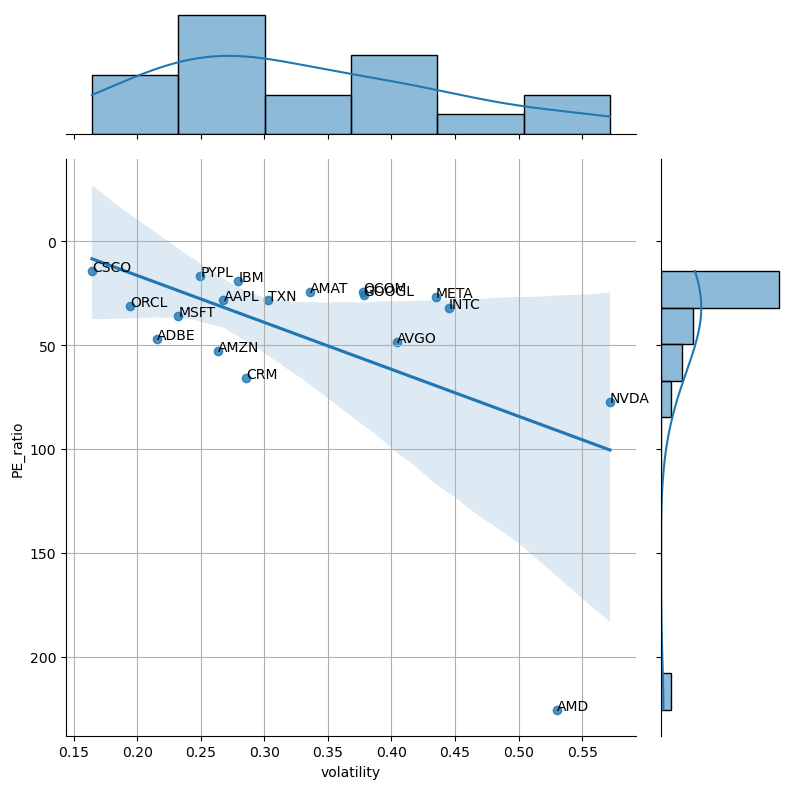

Saved plot for Technology as 'plots\Technology_PE_V.png'


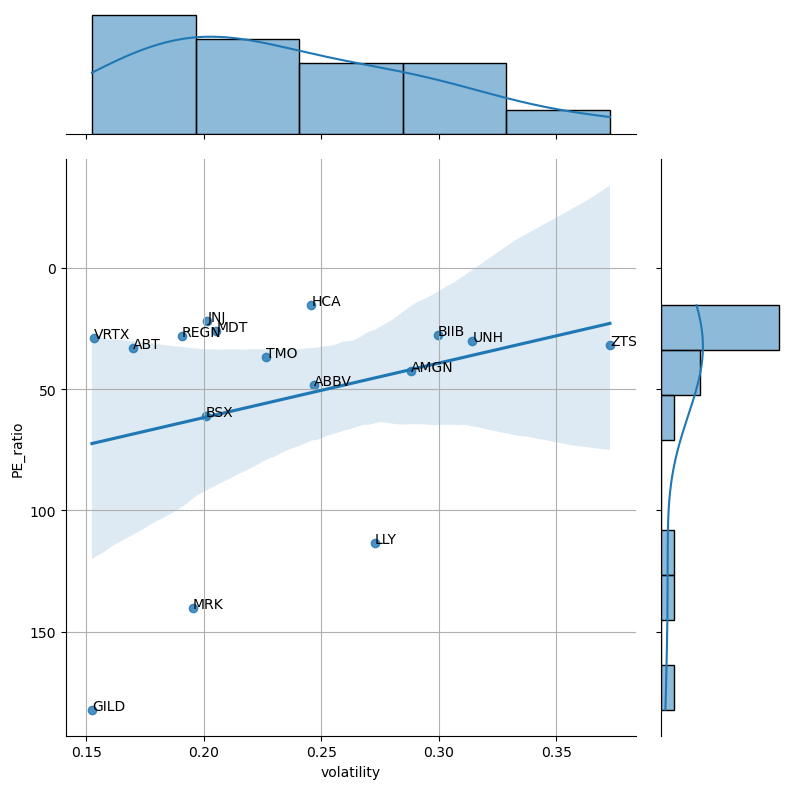

Saved plot for Healthcare as 'plots\Healthcare_PE_V.png'


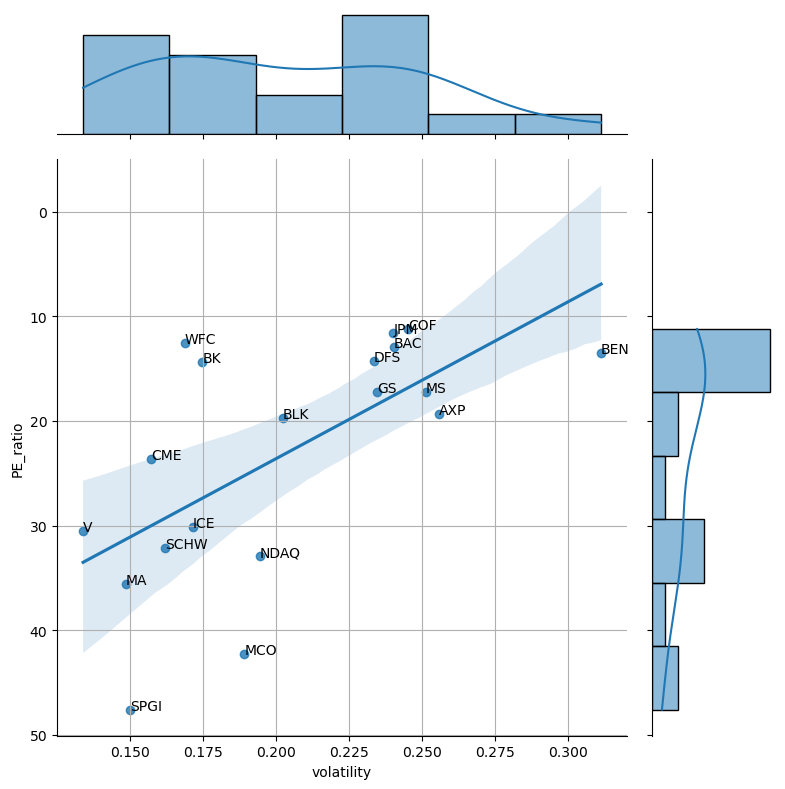

Saved plot for Finance as 'plots\Finance_PE_V.png'


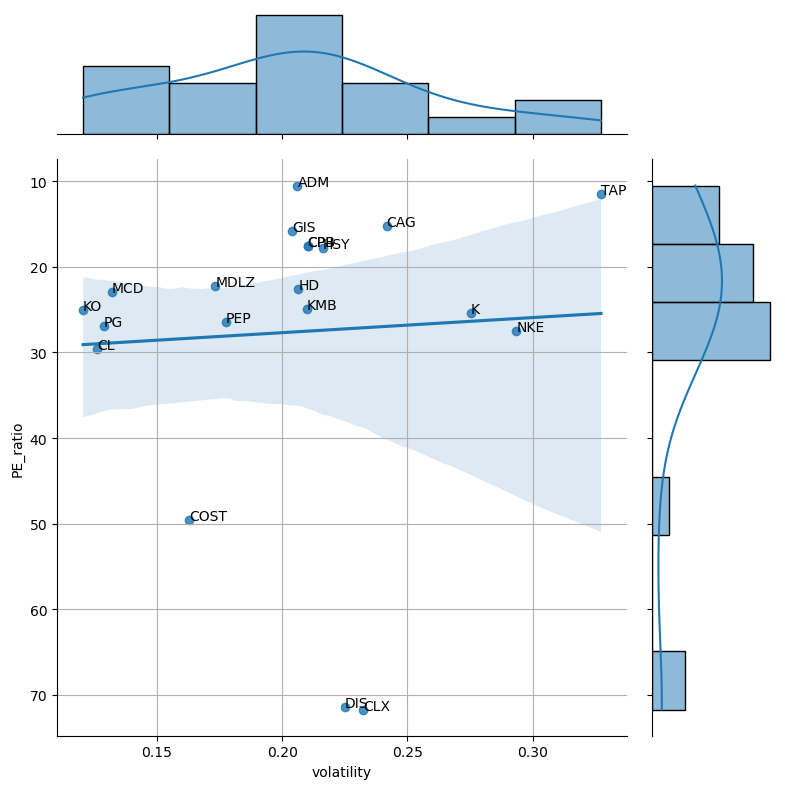

Saved plot for Consumer Goods as 'plots\Consumer Goods_PE_V.png'


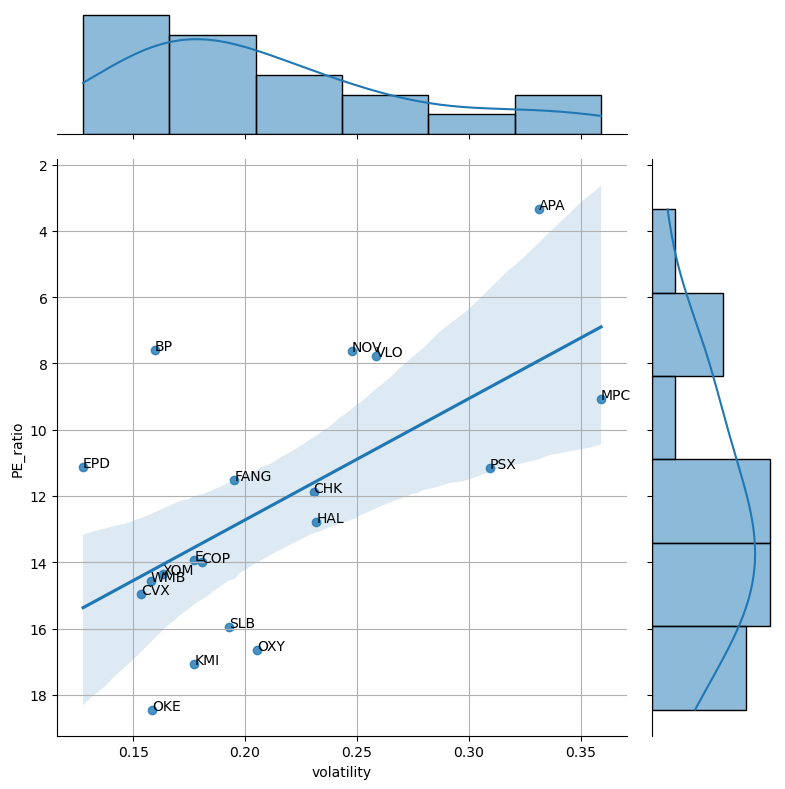

Saved plot for Energy as 'plots\Energy_PE_V.png'


In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")
#https://github.com/huseinzol05/Stock-Prediction-Models
#followed this example but with PE ratio vs Volality 
it = {
    'Technology': ["AAPL", "MSFT", "GOOGL", "AMZN", "META", "INTC", "CSCO", "NVDA", "ADBE", "CRM", "IBM", "ORCL", "PYPL", "TXN", "AVGO", "QCOM", "AMAT", "MU", "AMD", "WDC"],
    'Healthcare': ["JNJ", "PFE", "MRK", "UNH", "AMGN", "GILD", "ABBV", "BMY", "LLY", "MDT", "ABT", "TMO", "BIIB", "VRTX", "REGN", "BSX", "ILMN", "ZTS", "HCA"],
    'Finance': ["JPM", "BAC", "WFC", "GS", "MS", "BLK", "AXP", "V", "MA", "SCHW", "BK", "COF", "DFS", "SPGI", "ICE", "NDAQ", "CME", "MCO", "BEN"],
    'Consumer Goods': ["PG", "KO", "PEP", "DIS", "MCD", "NKE", "HD", "COST", "CL", "KMB", "MDLZ", "GIS", "K", "CPB", "HSY", "TAP", "ADM", "CLX", "CAG", "CPB"],
    'Energy': ["XOM", "CVX", "BP", "CHK", "COP", "SLB", "KMI", "EPD", "PSX", "OXY", "VLO", "MPC", "HAL", "FANG", "E", "OKE", "NOV", "WMB", "APA"]
}

sd = "plots"
if not os.path.exists(sd):
    os.makedirs(sd)
for ind, ts in it.items():
    id = []
    for t in ts:
        stk = yf.Ticker(t)
        h = stk.history(period="1y")
        if h.empty:
            print(f"No data found for {t}, possibly delisted or wrong ticker.")
            continue
        pr = stk.info.get('trailingPE', None)
        dr = h['Close'].pct_change()
        vol = dr.rolling(window=30)
        vol = vol.std().dropna().iloc[-1] * (252**0.5)
        if pr is not None:
            id.append({'PE_ratio': pr,'volatility': vol,'label': t})
    df = pd.DataFrame(id)
    g = sns.jointplot(x="volatility", y="PE_ratio", data=df, kind="reg", height=8, ratio=4)
    for i in range(df.shape[0]):
        g.ax_joint.text(df.loc[i, 'volatility'], df.loc[i, 'PE_ratio'], df.loc[i, 'label'])
    g.ax_joint.grid(True)
    g.ax_joint.invert_yaxis()
    pf = os.path.join(sd, f"{ind}_PE_V.png")
    plt.savefig(pf)
    plt.show()
    plt.close()
    print(f"Saved plot for {ind} as '{pf}'")